<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights_weights/heights_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/heights-and-weights/sex_heights_weights.csv")
df.shape

(1000, 4)

In [3]:
df.head()

,Name,Gender,Height,Weight
0,Jennifer Wolfe,Male,178.476999,88.993554
1,Tina Barber,Female,161.170414,67.397069
2,Dr. David Beasley Jr.,Female,165.886131,60.477043
3,Jake Lewis,Female,171.138179,54.824506
4,John Alvarez,Male,173.360926,81.982233


In [4]:
df.groupby('Gender').size()

Gender
Female    499
Male      501
dtype: int64

In [5]:
males_heights = df.loc[df['Gender'] == 'Male']['Height']
males_heights.head()

0     178.476999
4     173.360926
10    171.756076
12    176.693736
14    162.925575
Name: Height, dtype: float64

In [6]:
females_heights = df.loc[df['Gender'] == 'Female']['Height']
females_heights.head()

1    161.170414
2    165.886131
3    171.138179
5    160.595178
6    171.475277
Name: Height, dtype: float64

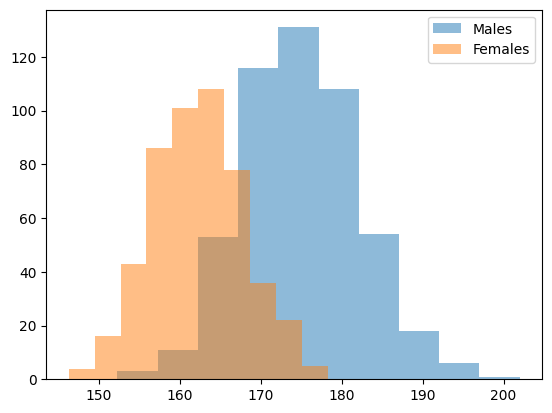

In [7]:
pyplot.hist(males_heights, alpha=0.5, label='Males')
pyplot.hist(females_heights, alpha=0.5, label='Females')
pyplot.legend(loc='upper right')
pyplot.show()

In [8]:
np.mean(males_heights)

174.987405659491

In [9]:
np.mean(females_heights)

162.24328798514392

In [10]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=31.339296972405272, pvalue=1.1687212633442504e-150)

In [11]:
sample1 = males_heights.sample(n=10)
sample1

764    183.044913
95     164.755395
528    176.818058
157    178.316830
513    168.647054
350    177.176353
562    181.097873
597    168.148654
270    185.088913
254    164.364410
Name: Height, dtype: float64

In [12]:
np.mean(sample1)

174.74584541057328

In [13]:
sample2 = males_heights.sample(n=10)
sample2

960    179.499059
965    185.080821
195    177.697222
582    179.429473
56     169.125477
185    179.998003
938    176.706605
674    165.147418
235    179.437433
357    172.979390
Name: Height, dtype: float64

In [14]:
np.mean(sample2)

176.51009011613098

In [15]:
np.mean(sample1) - np.mean(sample2)

-1.7642447055577009

In [16]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=-0.5786353828557003, pvalue=0.570005410470105)

In [17]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

0.031999343164919244

(array([  20.,  115.,  579., 1520., 2583., 2670., 1660.,  658.,  171.,
          24.]),
 array([-11.36502559,  -9.11291474,  -6.86080389,  -4.60869305,
         -2.3565822 ,  -0.10447135,   2.1476395 ,   4.39975034,
          6.65186119,   8.90397204,  11.15608289]),
 <BarContainer object of 10 artists>)

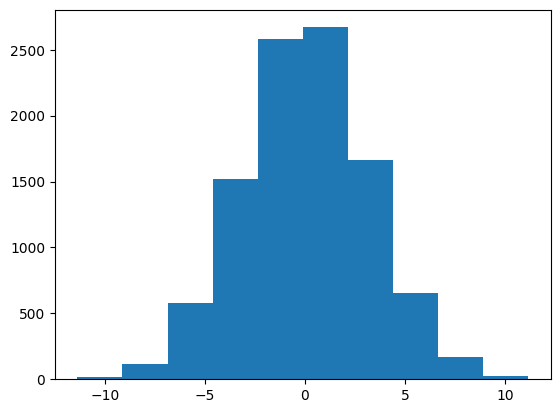

In [18]:
pyplot.hist(x=diff)

In [19]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

12.700821779361263

(array([  23.,  197.,  873., 2028., 2871., 2383., 1205.,  344.,   67.,
           9.]),
 array([ 2.73304987,  4.86562903,  6.99820818,  9.13078733, 11.26336649,
        13.39594564, 15.5285248 , 17.66110395, 19.7936831 , 21.92626226,
        24.05884141]),
 <BarContainer object of 10 artists>)

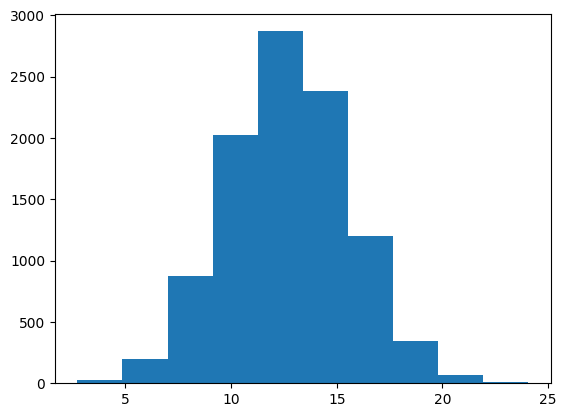

In [20]:
pyplot.hist(x=diff)